In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/fast_ds/thesis/experimentation/Segmentation/modification_testing
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/fast_ds/thesis/experimentation/Segmentation/modification_testing
ResUNetplusplus


In [2]:
%cd ./ResUNetplusplus
!ls 

/content/gdrive/My Drive/fast_ds/thesis/experimentation/Segmentation/modification_testing/ResUNetplusplus
'=1.0.7,'			       parameter_tuning.py
 bagging_approach.py		       process_image_deployment.py
 bagging_training_seed_old.py	       process_image.py
 bagging_training_seed.py	       process_image_sample.py
 boostrapping_images.ipynb	       process_image_tuning.py
 callbacks.py			       __pycache__
'Copy of execution_script.ipynb'       README.md
'Copy of TPU_execution_script.ipynb'   result
 data				       results.png
 data_generator.py		       resume_training.py
 deployment_model.py		       Resunet++.png
 execution_script.ipynb		       resunet_pp_modified.py
 files				       resunet.py
 files_before_tpu		       run_miouTesting.py
 files_kvasir_seg		       run_modified.py
 frozen_models			       run.py
 GFLOPs.ipynb			       run_sample.py
 hyperparameter_tuning.ipynb	       script_for_rafae.ipynb
 image_stiching.ipynb		       segmentation_metrics.py
 inference_script_cvc.ipynb	   

In [37]:
## Load Module
import os
import time
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import tifffile

In [38]:

im = tifffile.imread("data/CVC-ClinicDB/Copy of 598.tiff")
im.show()

AttributeError: ignored

In [39]:
from PIL import Image
im = Image.open("data/CVC-ClinicDB/Copy of 598.tiff")
cv2_imshow(im)

UnidentifiedImageError: ignored

In [26]:
## Define image parser
def parse_image(img_path, image_size):
    image_rgb = cv2.imread(img_path, 1)
    h, w, _ = image_rgb.shape
    if (h == image_size) and (w == image_size):
        pass
    else:
        image_rgb = cv2.resize(image_rgb, (image_size, image_size))
    image_rgb = image_rgb/255.0
    return image_rgb

def parse_mask(mask_path, image_size):
    mask = cv2.imread(mask_path, 1)
    h, w , _ = mask.shape
    if (h == image_size) and (w == image_size):
        pass
    else:
        mask = cv2.resize(mask, (image_size, image_size))
    # mask = np.expand_dims(mask, -1)
    # mask = mask/255.0

    return mask


def mask_to_3d(mask):
    mask = np.squeeze(mask)
    mask = [mask, mask, mask]
    mask = np.transpose(mask, (1, 2, 0))
    return mask

In [22]:
# Set path to test dataset CVC-ClinicDB
images_path = "data/Kvasir-SEG/images/"
masks_path = "data/Kvasir-SEG/masks/"

images_path = "data/CVC-ClinicDB/images/"
masks_path = "data/CVC-ClinicDB/masks/"

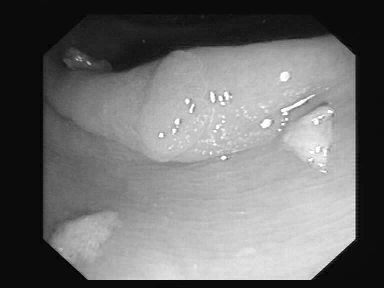

In [31]:
i = cv2.imread("data/CVC-ClinicDB/images/546.tif", 1)
cv2_imshow(i)

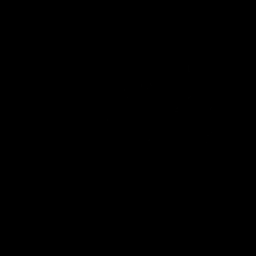

ValueError: ignored

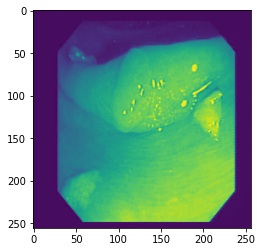

In [25]:
## Loop over each images

image_names = ['ck2bxiswtxuw80838qkisqjwz.jpg', 'ck2bxknhjvs1x0794iogrq49k.jpg','cjyzkmjy8evns070165gf9dmq.jpg','cju8828oxnool0801qno9luhr.jpg']
image_names = ['546.tif', '549.tif','467.tif','385.tif','265.tif']
stiched_image = []
image_size = 256
for image_name in image_names:

    # Load the test image
    image_path = images_path + image_name
    image = cv2.imread(image_path)
    H, W, _ = image.shape
    image = parse_image(image_path, image_size)

    mask_path = masks_path + image_name
    ground_truth_mask = parse_mask(mask_path, image_size)

    v_sep_line = np.ones((10, image_size, 3)) * 255

    # ground_truth_mask = mask_to_3d(ground_truth_mask)

    ## Order : original image, ground_truth, predict_mask1 , predict_mask2 , predict_mask3 , predict_mask_bagging
    all_images = [image * 255, v_sep_line, ground_truth_mask ]
    # cv2.imwrite(f"{Results}/{image_name}.png", np.concatenate(all_images, axis=1))
    # cv2_imshow(np.concatenate(all_images, axis=1)) 
    h_sep_line = np.ones((image_size*2 + 10, 5 , 3)) * 255
    print(np.concatenate(all_images, axis=0).shape)
    stiched_image.append(h_sep_line)
    stiched_image.append(np.concatenate(all_images, axis=0))
    
stiched_image.append(h_sep_line)
# cv2_imshow(np.concatenate(stiched_image, axis=0))
print(os.getcwd())
# cv2.imwrite("stiched_Kvasir-SEG.png", np.concatenate(stiched_image, axis=1))
cv2_imshow(np.concatenate(stiched_image, axis=1))

In [ ]:
mask_path

'data/Kvasir-SEG/masks/ck2bxiswtxuw80838qkisqjwz.jpg'

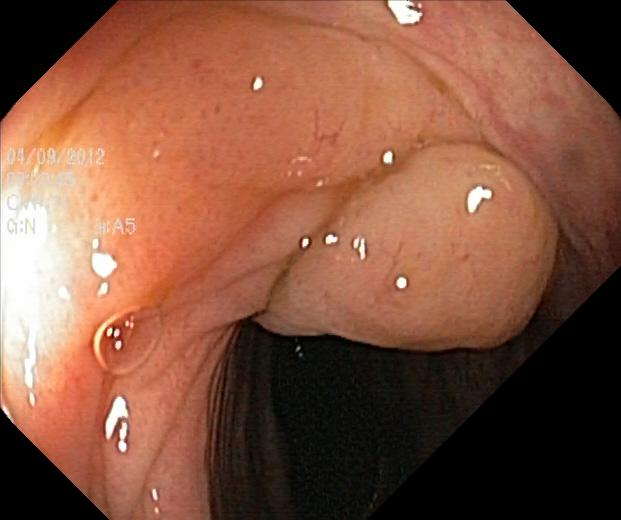

In [ ]:
cv2_imshow(cv2.imread("data/Kvasir-SEG/images/ck2bxiswtxuw80838qkisqjwz.jpg"))

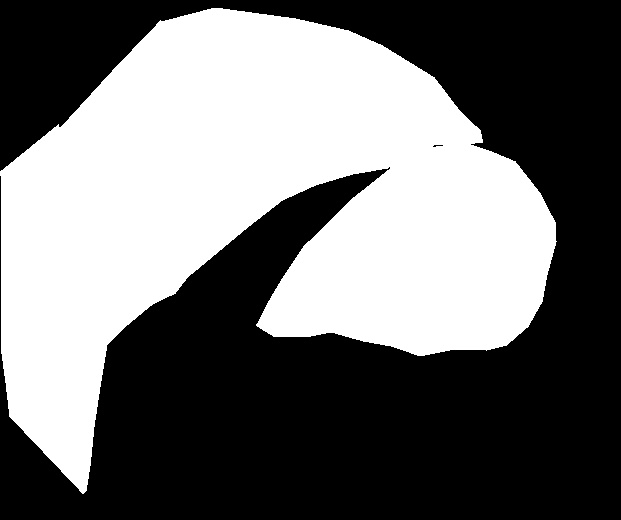

In [ ]:
cv2_imshow(cv2.imread(mask_path))

In [ ]:
mask = cv2.imread(image_path, 1)
h, w, _ = mask.shape
if (h == image_size) and (w == image_size):
  pass
else:
  mask = cv2.resize(mask, (image_size, image_size))
# mask = np.expand_dims(mask, -1)
# mask = mask/255.0

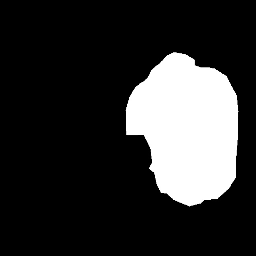

In [ ]:
cv2_imshow(ground_truth_mask)